C:\Users\asus\AppData\Local\Temp\ipykernel_2972\1764376489.py:30: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = word1.similarity(word2)


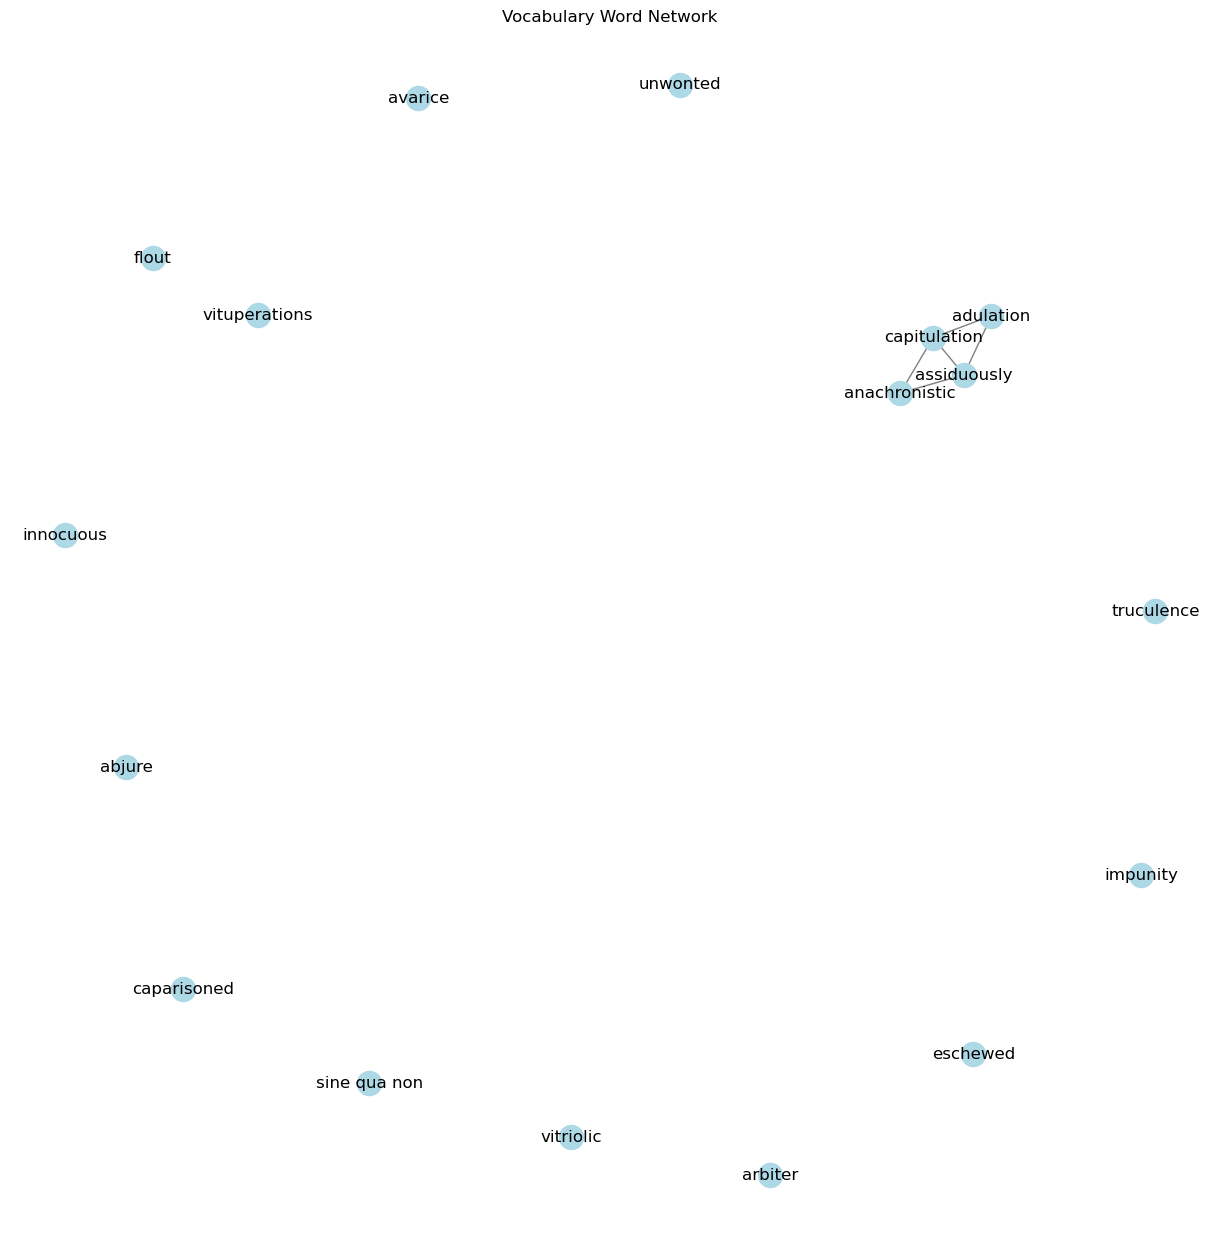

In [5]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Initialize SpaCy
nlp = spacy.load("en_core_web_md")

# Vocabulary words
words = [
    "unwonted", "truculence", "caparisoned", "innocuous", 
    "capitulation", "flout", "impunity", "sine qua non", 
    "vituperations", "vitriolic", "eschewed",'abjure','adulation',
    'anachronistic','arbiter','assiduously','avarice'
]

# Create SpaCy objects for each word
spacy_words = [nlp(word) for word in words]

# Create a graph
G = nx.Graph()

# Add nodes
for word in words:
    G.add_node(word)

# Add edges based on similarity
for i, word1 in enumerate(spacy_words):
    for j, word2 in enumerate(spacy_words):
        if j > i: # to avoid duplicate edges and self-loops
            similarity = word1.similarity(word2)
            # Add an edge if similarity is above a threshold (e.g., 0.5)
            if similarity > 0.5:
                G.add_edge(words[i], words[j], weight=similarity)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # for consistent layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        edge_color='gray', width=1.0, edge_cmap=plt.cm.Blues)
plt.title("Vocabulary Word Network")
plt.show()


In [16]:
# First you need to install spacy 
# then you need to install this
#!python -m spacy download en_core_web_md  # You can do iit in the jupyter itself

In [17]:
# Import spaCy
import spacy

# Create a blank English nlp object
nlp = spacy.blank("en")

In [18]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


In [19]:
doc = nlp("Hello world!")

# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

world


In [20]:
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

world!


In [21]:
doc = nlp("It costs $5.")

In [22]:
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


In [26]:
#!python -m spacy download en_core_web_sm

In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [34]:
## Part of Speech Tagging

In [50]:
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")
text = "My Name is Ritu Goyal"
# Process a text
doc = nlp(text)

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

My PRON
Name NOUN
is AUX
Ritu PROPN
Goyal PROPN


In [51]:
## predicting Syntactic Dependencies - Subject Verb Object

In [52]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

My PRON poss Name
Name NOUN nsubj is
is AUX ROOT is
Ritu PROPN compound Goyal
Goyal PROPN attr is


In [53]:
#nsubj: Nominal subject, dobj:direct object, det: determiner

In [54]:
# Process a text
doc = nlp("Down goes the ball!")

In [55]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Down ADV nsubj goes
goes VERB ROOT goes
the DET det ball
ball NOUN nsubj goes
! PUNCT punct goes


In [56]:
# Predicting Named Entities
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [57]:
# ORG: Organisation, GPE: Geographical entity, $1m is Money

In [58]:
spacy.explain("GPE")

'Countries, cities, states'

In [59]:
spacy.explain("NNP")

'noun, proper singular'

In [60]:
spacy.explain("dobj")

'direct object'

In [61]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [62]:
# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [63]:
#match_id: hash value of the pattern name
#start: start index of matched span
#end: end index of matched span

In [68]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

In [69]:
doc = nlp("2018 FIFA World Cup: France won!")

In [66]:
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

In [67]:
doc = nlp("I loved dogs but now I love cats more.")

I loved dogs but now I love cats more.

In [71]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

In [72]:
doc = nlp("I bought a smartphone. Now I'm buying apps.")

In [73]:
#{"OP": "!"}	Negation: match 0 times
#{"OP": "?"}	Optional: match 0 or 1 times
#{"OP": "+"}	Match 1 or more times
#{"OP": "*"}	Match 0 or more times

In [74]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]

# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", [pattern])

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


In [75]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [76]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [77]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
